# Decision Tree Classification
### Salary Prediction Using Decision Tree (Full EDA + Correlation + Confusion Matrix)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv("/content/salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


In [ ]:
df.isnull().sum()

,0
company,0
job,0
degree,0
salary_more_then_100k,0


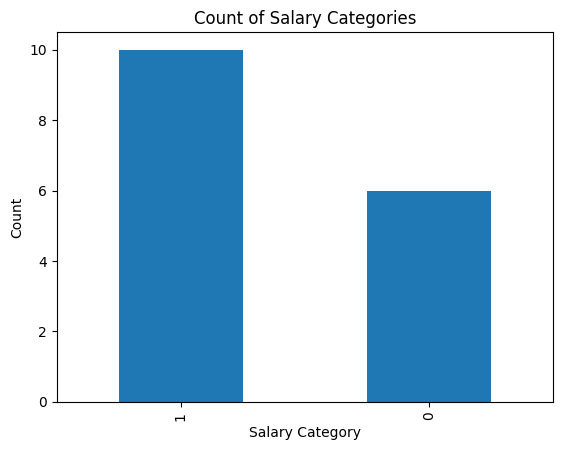

In [ ]:
df['salary_more_then_100k'].value_counts().plot(kind='bar')
plt.xlabel("Salary Category")
plt.ylabel("Count")
plt.title("Count of Salary Categories")
plt.show()

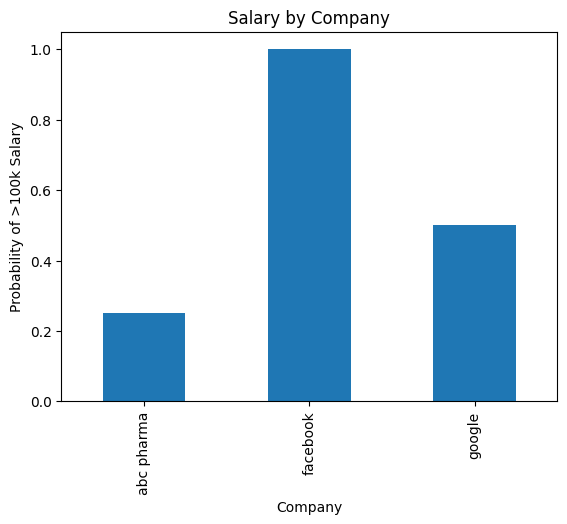

In [ ]:
df.groupby('company')['salary_more_then_100k'].mean().plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Probability of >100k Salary')
plt.title('Salary by Company')
plt.show()

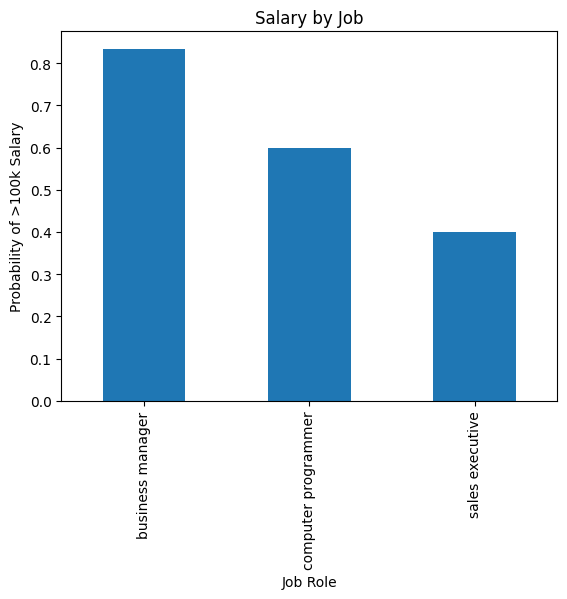

In [ ]:
df.groupby('job')['salary_more_then_100k'].mean().plot(kind='bar')
plt.xlabel('Job Role')
plt.ylabel('Probability of >100k Salary')
plt.title('Salary by Job')
plt.show()

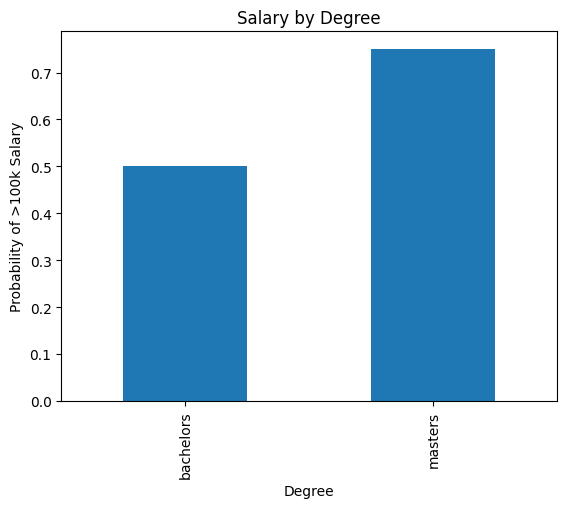

In [ ]:
df.groupby('degree')['salary_more_then_100k'].mean().plot(kind='bar')
plt.xlabel('Degree')
plt.ylabel('Probability of >100k Salary')
plt.title('Salary by Degree')
plt.show()

In [ ]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()



df['company_n'] = le_company.fit_transform(df['company'])
df['job_n'] = le_job.fit_transform(df['job'])
df['degree_n'] = le_degree.fit_transform(df['degree'])

In [ ]:
df

,company,job,degree,salary_more_then_100k,company_n,job_n,degree_n
0,google,sales executive,bachelors,0,2,2,0
1,google,sales executive,masters,0,2,2,1
2,google,business manager,bachelors,1,2,0,0
3,google,business manager,masters,1,2,0,1
4,google,computer programmer,bachelors,0,2,1,0
5,google,computer programmer,masters,1,2,1,1
6,abc pharma,sales executive,masters,0,0,2,1
7,abc pharma,computer programmer,bachelors,0,0,1,0
8,abc pharma,business manager,bachelors,0,0,0,0
9,abc pharma,business manager,masters,1,0,0,1


In [ ]:
corr = df[['company_n','job_n','degree_n','salary_more_then_100k']].corr()
corr

,company_n,job_n,degree_n,salary_more_then_100k
company_n,1.000000e+00,0.108941,-1.777780e-17,0.124035
job_n,1.089410e-01,1.000000,7.559289e-02,-0.370842
degree_n,-1.777780e-17,0.075593,1.000000e+00,0.258199
salary_more_then_100k,1.240347e-01,-0.370842,2.581989e-01,1.000000


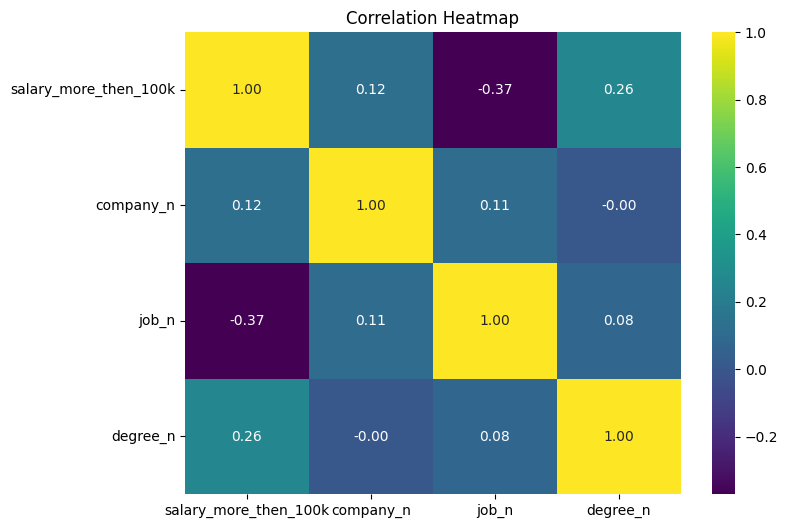

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
inputs = df[['company_n','job_n','degree_n']]
target = df['salary_more_then_100k']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    inputs, target, test_size=0.2, random_state=42
)

In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 1.0
Testing Accuracy: 0.75


In [ ]:
print(model.predict([[2,1,0]]))
print(model.predict([[2,1,1]]))

[0]
[0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 0],
       [1, 2]])

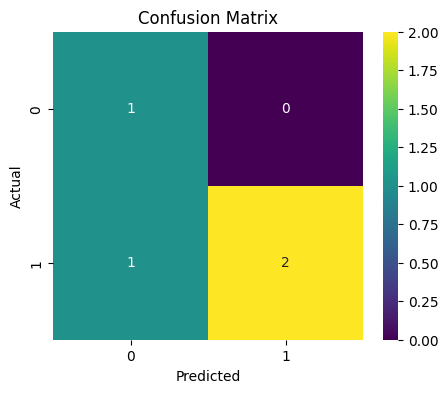

In [ ]:
# Generate predictions
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

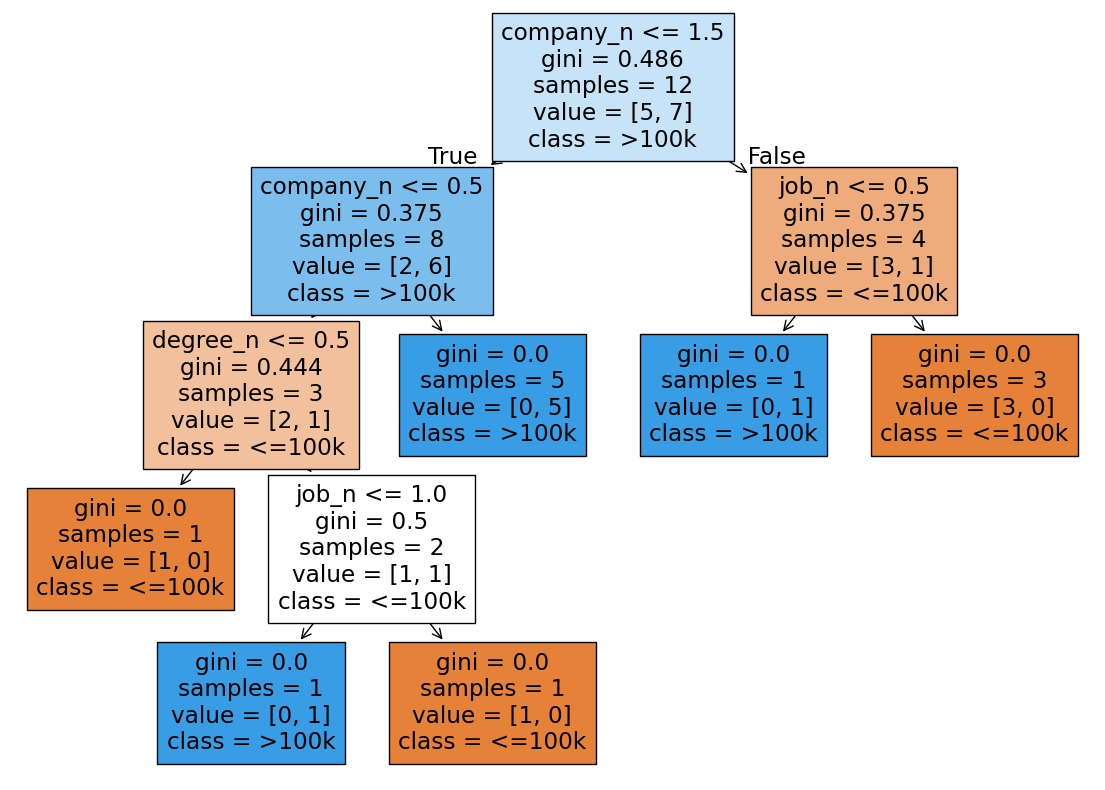

In [ ]:
plt.figure(figsize=(14, 10))
tree.plot_tree(
    model,
    feature_names=['company_n', 'job_n', 'degree_n'],
    class_names=['<=100k', '>100k'],
    filled=True
)
plt.show()